In [5]:
import pandas as pd

# Grid Illustration

In [15]:
geoData = pd.read_csv('../Data/geodata/bbox2.csv') #read data
geoData.drop(['Unnamed: 0'], axis=1, inplace=True) #drop unneccesary column

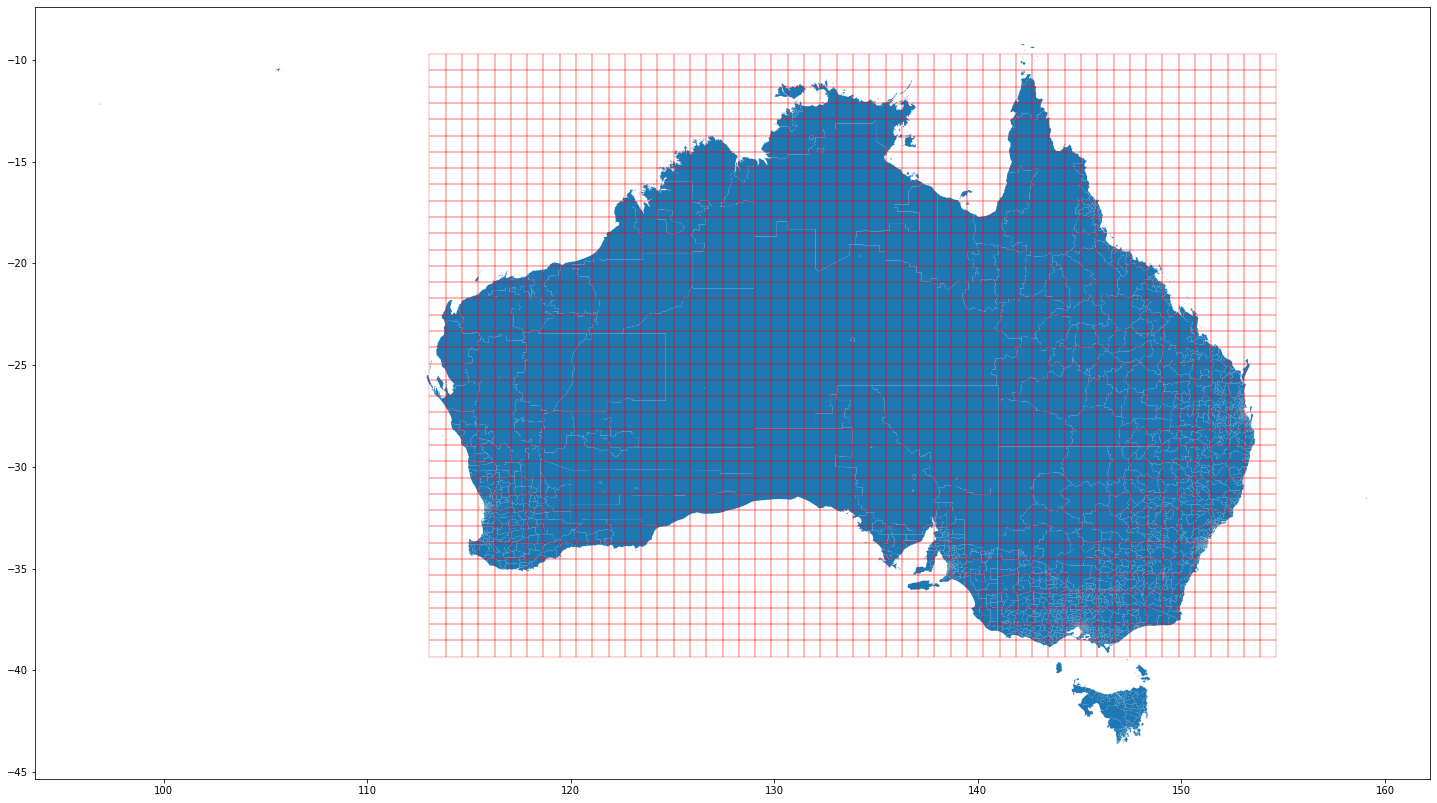

In [16]:
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

world = gpd.read_file('../Data/geodata/aus_poas.shp')
world.bounds
world.total_bounds
# bounds for individual geometries
poly_geom = geoData
b = poly_geom.apply(lambda row: box(row.min_x, row.min_y, row.max_x, row.max_y), axis=1)
boxes = gpd.GeoDataFrame(poly_geom, geometry=b)

# visualize
ax = world.plot(figsize=(25,25),)
boxes.boundary.plot(color='r', ax=ax,cmap="Blues", linewidth=0.3)
plt.show()


# Data Anlysis

In [17]:
data = pd.read_csv('../Data/Frog_Orccurence_Merged.csv')

  0%|          | 0/3194 [00:00<?, ?it/s]

DataPrep Report
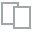
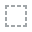
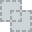
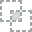
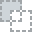
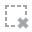
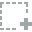
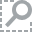
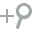
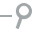
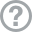
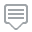
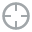
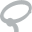
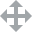
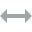
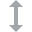
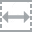
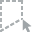
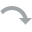
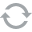
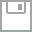
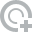
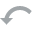
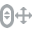
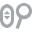
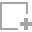
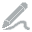
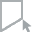
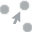
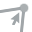
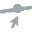

In [10]:

from dataprep.eda import  create_report

create_report(data)


# Map of frogs

In [21]:
# First create a filter for countries
df = data
df['countrycode'] = 0
#assign IT as country code where index is between 0 and 889
df.loc[(df.index>=0) & (df.index<=889),'countrycode'] = "IT"
#assign ZA as country code where index is between 890 and 1562
df.loc[(df.index>=890) & (df.index<=1562),'countrycode'] = "ZA"
#assign CR as country code where index is between 1563 and 1756
df.loc[(df.index>=1563) & (df.index<=1756),'countrycode'] = "CR"
#assign AUS as country code where index is between 1757 and 5002
df.loc[(df.index>=1757) & (df.index<=5002),'countrycode'] = "AUS"
#assign USA as country code where index is between 5003 and 20174
df.loc[(df.index>=5003) & (df.index<=20174),'countrycode'] = "USA"
#assign Canada as country code where index is between 20175 and 23372
df.loc[(df.index>=20175) & (df.index<=23372),'countrycode'] = "CAN"

In [22]:
AUS = data.loc[data['countrycode'] == 'AUS']
CA = data.loc[data['countrycode'] == 'CAN']
IT = data.loc[data['countrycode'] == 'IT']
ZA = data.loc[data['countrycode'] == 'ZA']
CR = data.loc[data['countrycode'] == 'CR']
USA = data.loc[data['countrycode'] == 'USA']

<AxesSubplot:>

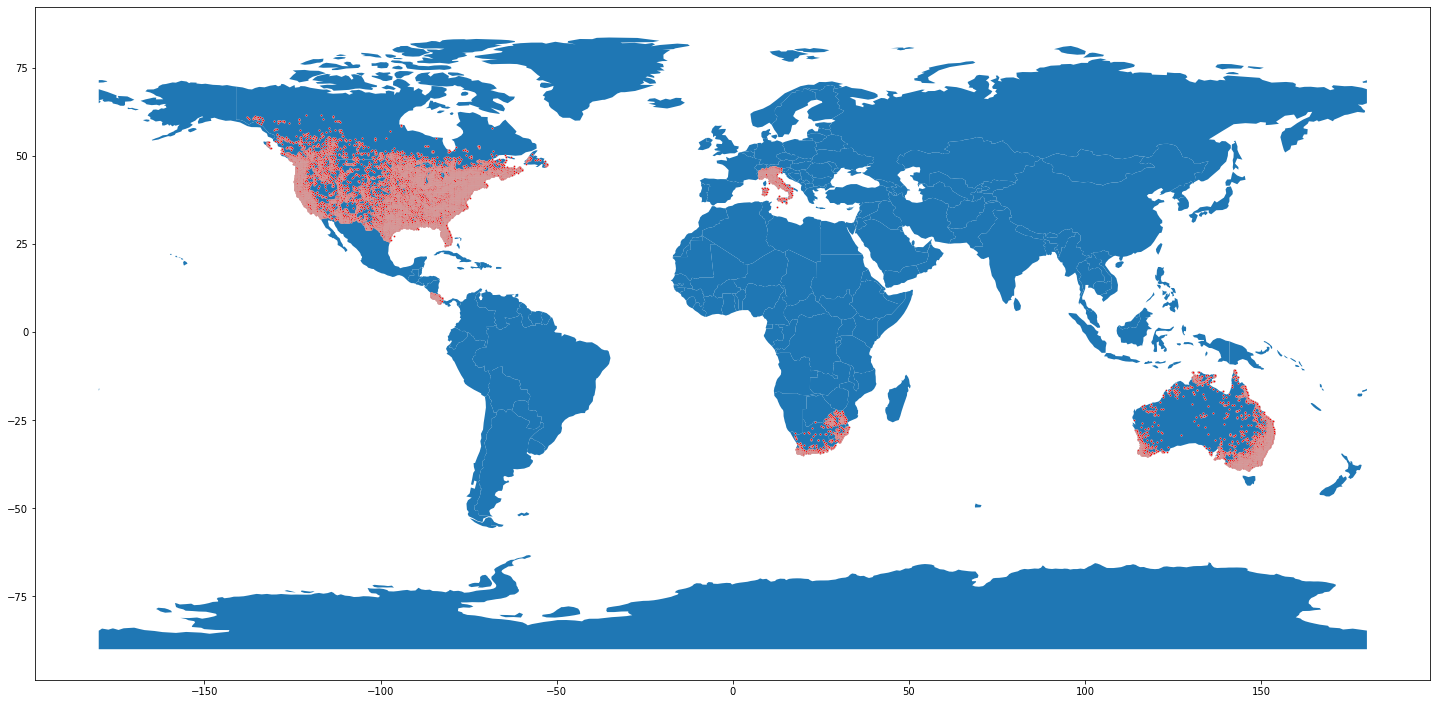

In [32]:
import seaborn as sns
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

df = data

df["lon"] = (df["min_lon"]+df["max_lon"])/2
df["lat"] = (df["min_lat"]+df["max_lat"])/2
aus_poas = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


geometry = [Point(xy) for xy in zip(df["lon"], df["lat"])]
gdf = GeoDataFrame(df, geometry=geometry)


gdf.plot(color="red", marker='o', linewidth=0.4, markersize=3, ax=aus_poas.plot(figsize=(25, 25)), edgecolor="0.8")